In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


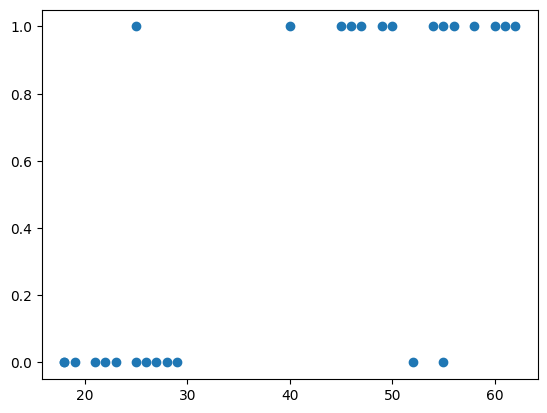

In [17]:
plt.scatter(df["age"],df["bought_insurance"])

In [18]:
x = df[["age"]]
y = df[["bought_insurance"]]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(x_train, y_train)

/home/dhami/Documents/python/juptyer-stuff/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
y_pred = model.predict(x_test)

In [24]:
model.score(x_test, y_test)

0.8333333333333334

In [25]:
df.head(2)

,age,bought_insurance
0,22,0
1,25,0


In [26]:
m = model.coef_
c = model.intercept_
s = 1 / (1 + np.exp(-(m * 22 + c)))
s

array([[0.1037646]])

/home/dhami/Documents/python/juptyer-stuff/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


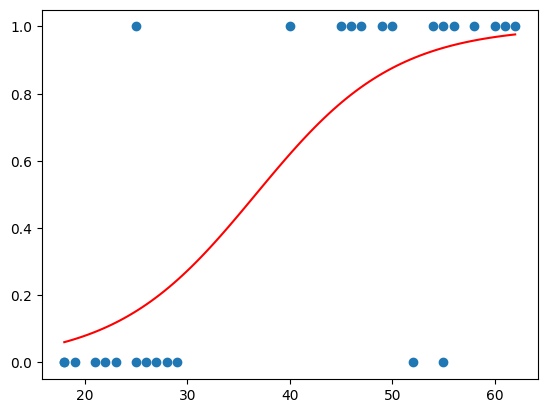

In [33]:
ages = np.linspace(df["age"].min(), df["age"].max(), 100).reshape(-1,1)
s = model.predict_proba(ages)[:,1]
plt.scatter(df["age"], df["bought_insurance"])
plt.plot(ages, s,color='red')

In [34]:
import joblib
joblib.dump(model, "model.joblib")

['model.joblib']